# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

For this assignment, you will use reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle.  

To accomplish this, you must modify the code discussed in lecture for learning to play Tic-Tac-Toe.  Modify the code  so that it learns to solve the three-disk, three-peg
Towers of Hanoi Puzzle.  In some ways, this will be simpler than the
Tic-Tac-Toe code.  

Steps required to do this include the following:

  - Represent the state, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $1$ to each move, even for the move that results in the goal state.

Make a plot of the number of steps required to reach the goal for each
trial.  Each trial starts from the same initial state.  Decay epsilon
as in the Tic-Tac-Toe code.

## Requirements

First, how should we represent the state of this puzzle?  We need to keep track of which disks are on which pegs. Name the disks 1, 2, and 3, with 1 being the smallest disk and 3 being the largest. The set of disks on a peg can be represented as a list of integers.  Then the state can be a list of three lists.

For example, the starting state with all disks being on the left peg would be `[[1, 2, 3], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3], [1], []]`.

To represent that move we just made, we can use a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.

Now on to some functions. Define at least the following functions. Examples showing required output appear below.

   - `printState(state)`: prints the state in the form shown below
   - `validMoves(state)`: returns list of moves that are valid from `state`
   - `makeMove(state, move)`: returns new (copy of) state after move has been applied.
   - `trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of number of steps to reach goal for each repetition.
   - `testQ(Q, maxSteps, validMovesF, makeMoveF)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

A function that you might choose to implement is

   - `stateMoveTuple(state, move)`: returns tuple of state and move.  
    
This is useful for converting state and move to a key to be used for the Q dictionary.

Show the code and results for testing each function.  Then experiment with various values of `nRepetitions`, `learningRate`, and `epsilonDecayFactor` to find values that work reasonably well, meaning that eventually the minimum solution path of seven steps is found consistently.

Make a plot of the number of steps in the solution path versus number of repetitions. The plot should clearly show the number of steps in the solution path eventually reaching the minimum of seven steps, though the decrease will not be monotonic.  Also plot a horizontal, dashed line at 7 to show the optimal path length.

Add markdown cells in which you describe the Q learning algorithm and your implementation of Q learning as applied to the Towers of Hanoi problem.  Use at least 15 sentences, in one or more markdown cells.

## Objective

The goal is to move all the disks from 1st peg to 3rd peg. There are two constraints as follows:
1. Only one disk can be moved at a given point of time.
2. A larger valued disk can never be placed on a smaller valued disk.

## Code Description

* **printState(state):** This function prints the state in a specific format. State is a nested list and elements of each list are stored in variables which are then used to print.
* **makeMove(state, move):** State is copied in order to avoid changes in the original state. Calculate the index by subtracting one from the move(since pegs are named 1,2 and 3 and list index starts with 0,1 and so on). Get the top element of the peg and insert it into new peg and delete it from old peg.
* **stateMoveTuple:** This function returns the tuple of state and move which is used as a key for the dictionary.
* **validMoves(state):** Returns lists of valid moves for that state. Pegs are represented as state1, state2 and state3. If any of these pegs(/states) are empty, validMoves list is appended with move(non_empty state, empty state). If the state is not empty, then the top disk/element is saved in a variable which is then compared with the top element of other pegs/states. validMoves list is appended with (peg having low top value, peg having high top value).

In [1]:
import numpy as np
from copy import deepcopy

def printState(state):    
    if state[0]==[]:                             # Check Peg1 is empty
        state00=' '
        state01=' '
        state02=' '
    elif len(state[0])==1:                       # Peg1 contains 1 disk
        state00=' '
        state01=' '
        state02=state[0][0]
    elif len(state[0])==2:                       # Peg1 contains 2 disks
        state00=' '
        state01=state[0][0]
        state02=state[0][1] 
    elif len(state[0])==3:                       # Peg1 contains 3 disks
        state00=state[0][0]
        state01=state[0][1]
        state02=state[0][2]        
    if state[1]==[]:                             # Check Peg2 is empty
        state10=' '
        state11=' '
        state12=' '
    elif len(state[1])==1:                       # Peg2 contains 1 disk
        state10=' '
        state11=' '
        state12=state[1][0]
    elif len(state[1])==2:                       # Peg2 contains 2 disks
        state10=' '
        state11=state[1][0]
        state12=state[1][1] 
    elif len(state[1])==3:                       # Peg2 contains 3 disks
        state10=state[1][0]
        state11=state[1][1]
        state12=state[1][2]    
    if state[2]==[]:                             # Check Peg3 is empty
        state20=' '
        state21=' '
        state22=' '
    elif len(state[2])==1:                       # Peg3 contains 1 disk
        state20=' '
        state21=' '
        state22=state[2][0]
    elif len(state[2])==2:                       # Peg3 contains 2 disks
        state20=' '
        state21=state[2][0]
        state22=state[2][1] 
    elif len(state[2])==3:                       # Peg3 contains 3 disks
        state20=state[2][0]
        state21=state[2][1]
        state22=state[2][2]
    print('{} {} {}\n{} {} {}\n{} {} {}\n---------------------------------'.format(state00,state10,state20,state01,state11,state21,state02,state12,state22))

def makeMove(state, move):
    newState=deepcopy(state)                     # Copy state
    oldpeg=move[0]-1                             # list index = peg-1
    newpeg=move[1]-1
    disk=newState[oldpeg][0]                     # Get the top disk
    newState[newpeg].insert(0,disk)
    newState[oldpeg].remove(disk)
    return newState
    
def stateMoveTuple(state, move):                 # returns tuple of state and move
    stateTuple = tuple(tuple(i) for i in state)
    moveTuple = tuple(move)
    smtuple= (stateTuple,moveTuple)
    return smtuple
        
def validMoves(state):
    copyState=deepcopy(state)
    validMoves=[]
    state1=copyState[0]                  # Peg1
    state2=copyState[1]                  # Peg2
    state3=copyState[2]                  # Peg3
    state10=0
    state20=0
    state30=0
    
    if state1 == []:                      # if Peg1 is empty, disks from other pegs can be moved to peg1
        if state2 != []:
            validMoves.append([2,1])
        if state3 != []:
            validMoves.append([3,1])
    elif state1 != []:                    # if not empty, get the top disk 
        state10 = state1[0]
        
    if state2 == []:                      # if Peg2 is empty, disks from other pegs can be moved to peg2
        if state1 != []:
            validMoves.append([1,2])
        if state3 != []:
            validMoves.append([3,2])
    elif state2 != []:
        state20 = state2[0]               # if not empty, get the top disk 
        
    if state3 == []:                      # if Peg3 is empty, disks from other pegs can be moved to peg3
        if state1 != []:
            validMoves.append([1,3])
        if state2 != []:
            validMoves.append([2,3])
    elif state3 != []:
        state30 = state3[0]               # if not empty, get the top disk 
     
    # if pegs are not empty, check top disks values and append validMoves list accordingly
    if state10 != 0 and state20 != 0:     
        if state10 < state20:
            validMoves.append([1,2])
        elif state20 < state10:
            validMoves.append([2,1])
    
    if state10 != 0 and state30 != 0:
        if state10 < state30:
            validMoves.append([1,3])
        elif state30 < state10:
            validMoves.append([3,1])
    
    if state20 != 0 and state30 != 0:
        if state20 < state30:
            validMoves.append([2,3])
        elif state30 < state20:
            validMoves.append([3,2])
        
    return validMoves
        

## Code Description:

* **winner(state,move):** This function is used to check whether the goal has been reached.
* **getQ(state,Q,move):** Returns the Q value. An immutable key value is used for the dictionary. This is achieved using stateMoveTuple function.
* **epsilonGreedy(epsilon,Q,state):** This function collects valid moves and returns the move having maximum value of Q.

In [2]:
import random
def winner(state,move):                  # Returns 1 if goal reached
    copy_state= deepcopy(state)
    state_new=makeMove(copy_state,move)
    if state_new==[[],[],[1,2,3]]:
        return 1
    else:
        return 0

def getQ(state, Q, move):                # Returns Q using key
    if winner(state,move):
        return 0
    key= stateMoveTuple(state,move)
    return Q.get(key,-1)
    

def epsilonGreedy(epsilon, Q, state):    # Returns random move or greedy move based on epsilon value
    valid_moves = validMoves(state)
    if np.random.uniform() < epsilon:
        # Random Move
        return random.choice(valid_moves)
    else:
        # Greedy Move
        Qs = np.array([getQ(state, Q, m) for m in valid_moves]) 
        return valid_moves[ np.argmin(Qs) ]
    

## Temporal Difference

Temporal Difference is a technique used in reinforcement learning in which the discovered error is pushed in a movement to the previous state.
$$Q(oldstate,oldmove) = Q(oldstate,oldmove) + learningrate * (1 + Q(state,move) - Q(oldstate,oldmove))$$
The above equation, creates a Q table of positive values that approach 0 near the goal. Thus, the grredy search is looking for minimum value.

## Code Description

* **trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):** For a given number of repetitions, the puzzle is solved repeatedly with the moves returns by the epsilonGreedy function. Update Q for steps > 1. Temporal difference error is calculated and multiplied with the learning rate to get Q. makeMoveF function is used to make the move and change the state. winner function is used to check if the goal is reached.

In [3]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    Q = {}
    startState=[[1,2,3],[],[]]
    stepsToGoal = []
    epsilon=1
    
    for i in range(0,nRepetitions):
        epsilon *= epsilonDecayFactor
        maxMoves=10000
        done= False
        state = startState
        path= [startState]
        old_move = None
        old_state = None
        while not done and len(path) < maxMoves:
            move = epsilonGreedy(epsilon, Q, state)
            if old_move is not None:
                # update Q
                old_key= stateMoveTuple(old_state,old_move)
                TD_error=1+ getQ(state, Q, move) - getQ(old_state, Q, old_move)   # Calculate Temporal Difference
                old_Q = getQ (old_state, Q, old_move)                      # Get Q from previous state
                old_Q += learningRate * TD_error                           # Update with learning rate and error
                Q[old_key] = old_Q
            old_state= state
            state = makeMoveF(state,move)
            old_move = move
            path.append(state)
            if winner(old_state,old_move):                                  # Check if Goal reached, then quit 
                done=True
        stepsToGoal.append(len(path)-1)
    return Q,np.array(stepsToGoal)

## Code Description

* **testQ(Q, maxSteps, validMovesF, makeMoveF):** Epsilon is kept 0 in order to choose the greedy move always.

In [4]:
def testQ(Q, maxSteps, validMovesF, makeMoveF):
    startState=[[1,2,3],[],[]]
    epsilon=0
    done= False
    state = startState
    path= [startState]
    old_move = None
    old_state = None
    while not done and len(path) < maxSteps:
        move = epsilonGreedy(epsilon, Q, state)         # Get greedy move as epsilon is 0
        old_state= state
        state = makeMoveF(state,move)
        old_move = move
        path.append(state)
        if winner(old_state,old_move):
            done=True
    return path

# Examples

In [5]:
state = [[1, 2, 3], [], []]
printState(state)

1    
2    
3    
---------------------------------


In [6]:
move =[1, 2]

stateMoveTuple(state, move)

(((1, 2, 3), (), ()), (1, 2))

In [7]:
newstate = makeMove(state, move)
newstate

[[2, 3], [1], []]

In [8]:
printState(newstate)

     
2    
3 1  
---------------------------------


In [76]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [77]:
stepsToGoal

array([ 44, 175,  38, 120,  50,  35,   9,  28,  15,  19,  25,   9,  53,
         7,  11,   9,   8,  15,   7,   9,  12,   7,  15,   7,   7,  28,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7])

In [78]:
path = testQ(Q, 20, validMoves, makeMove)
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [84]:
for s in path:
    printState(s)
    print()

1    
2    
3    
---------------------------------

     
2    
3   1
---------------------------------

     
     
3 2 1
---------------------------------

     
  1  
3 2  
---------------------------------

     
  1  
  2 3
---------------------------------

     
     
1 2 3
---------------------------------

     
    2
1   3
---------------------------------

    1
    2
    3
---------------------------------



Text(0.5,1,'Number of Steps vs Number of Repetitions')

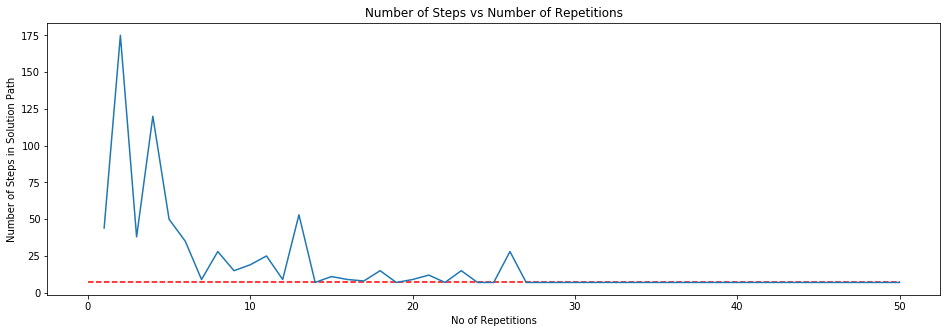

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=7, xmin=0.0, xmax=50.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

Experimenting with different values of nRepetitions, Learning Rate and epsilon dacay factor.

## Experiment 1

In [80]:
Q, stepsToGoal = trainQ(50, 1, 0.2, validMoves, makeMove)
stepsToGoal

array([ 75, 123,  57,  11,  39,  19,  14,  10,  11,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7])

In [81]:
path = testQ(Q, 20, validMoves, makeMove)
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [83]:
for s in path:
    printState(s)
    print()

1    
2    
3    
---------------------------------

     
2    
3   1
---------------------------------

     
     
3 2 1
---------------------------------

     
  1  
3 2  
---------------------------------

     
  1  
  2 3
---------------------------------

     
     
1 2 3
---------------------------------

     
    2
1   3
---------------------------------

    1
    2
    3
---------------------------------



Text(0.5,1,'Number of Steps vs Number of Repetitions')

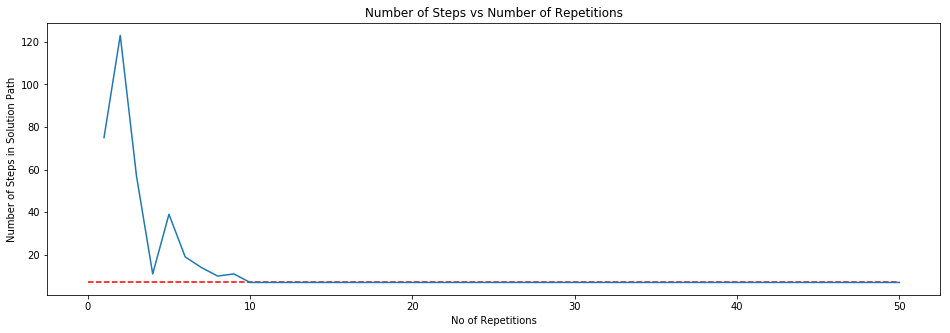

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=7, xmin=0.0, xmax=50.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

## Experiment 2

In [70]:
Q, stepsToGoal = trainQ(50, 0.5, 0.5, validMoves, makeMove)

In [71]:
stepsToGoal

array([247,  29,  98,   8,  81,  23,  19,  23,  43,  17,  12,  11,  34,
        16,   7,  18,   7,  11,   7,   7,   9,   7,  13,   9,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7])

In [72]:
path = testQ(Q, 20, validMoves, makeMove)

In [73]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

Text(0.5,1,'Number of Steps vs Number of Repetitions')

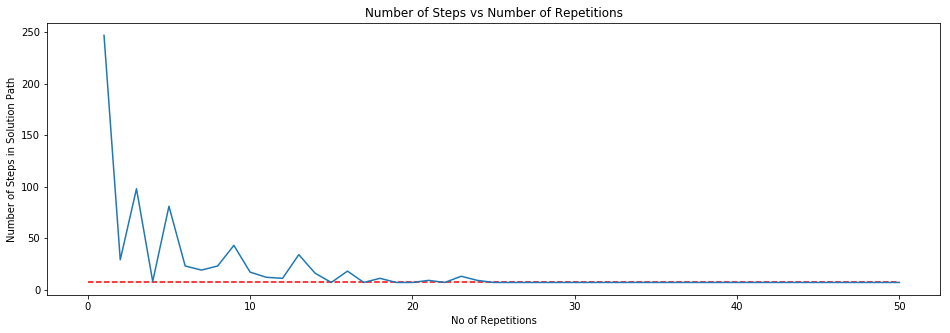

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(stepsToGoal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, stepsToGoal)
plt.hlines(y=7, xmin=0.0, xmax=50.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

## Observation

It took around roughly 25 repetitions to get the optimal path solution(i.e. & steps in our case). While experimenting with various values of `nRepetitions`, `learningRate`, and `epsilonDecayFactor`, I found that for nRepetitions=50, learningRate=1 and epsilonDecayFactor=0.2, work reasonably well, meaning that eventually the minimum solution path of seven steps is found consistently.

## Extra Credit

Modify your code to solve the Towers of Hanoi puzzle with 4 disks instead of 3.  Name your functions

    - printState_4disk
    - validMoves_4disk
    - makeMove_4disk

Find values for number of repetitions, learning rate, and epsilon decay factor for which trainQ learns a Q function that testQ can use to find the shortest solution path.  Include the output from the successful calls to trainQ and testQ.

## Code Description:

The code is similar to the 3 peg puzzle with few changes.

In [15]:
import numpy as np
from copy import deepcopy

def printState_4disk(state):    
    if state[0]==[]:                                     # Check Peg1 is empty
        state00=' '
        state01=' '
        state02=' '
        state03=' '
    elif len(state[0])==1:                               # Peg1 contains 1 disk
        state00=' '
        state01=' '
        state02=' '
        state03=state[0][0]
    elif len(state[0])==2:                               # Peg1 contains 2 disks
        state00=' '
        state01=' '
        state02=state[0][0]
        state03=state[0][1] 
    elif len(state[0])==3:                               # Peg1 contains 3 disks
        state00=' '
        state01=state[0][0]
        state02=state[0][1]
        state03=state[0][2]
    elif len(state[0])==4:                               # Peg1 contains 4 disks
        state00=state[0][0]
        state01=state[0][1]
        state02=state[0][2]
        state03=state[0][3]
    if state[1]==[]:                                     # Check Peg2 is empty
        state10=' '
        state11=' '
        state12=' '
        state13=' '
    elif len(state[1])==1:                               # Peg2 contains 1 disk
        state10=' '
        state11=' '
        state12=' '
        state13=state[1][0]
    elif len(state[1])==2:                               # Peg2 contains 2 disks
        state10=' '
        state11=' '
        state12=state[1][0]
        state13=state[1][1] 
    elif len(state[1])==3:                               # Peg2 contains 3 disks
        state10=' '
        state11=state[1][0]
        state12=state[1][1]
        state13=state[1][2] 
    elif len(state[1])==4:                               # Peg2 contains 4 disks
        state10=state[1][0]
        state11=state[1][1]
        state12=state[1][2]
        state13=state[1][3]
    if state[2]==[]:                                     # Check Peg3 is empty
        state20=' '
        state21=' '
        state22=' '
        state23=' '
    elif len(state[2])==1:                               # Peg3 contains 1 disk
        state20=' '
        state21=' '
        state22=' '
        state23=state[2][0]
    elif len(state[2])==2:                               # Peg3 contains 2 disks
        state20=' '
        state21=' '
        state22=state[2][0]
        state23=state[2][1] 
    elif len(state[2])==3:                               # Peg3 contains 3 disks
        state20=' '
        state21=state[2][0]
        state22=state[2][1]
        state23=state[2][2]
    elif len(state[2])==4:                               # Peg3 contains 4 disks
        state20=state[2][0]
        state21=state[2][1]
        state22=state[2][2]
        state23=state[2][3]
    if state[3]==[]:                                     # Check Peg4 is empty
        state30=' '
        state31=' '
        state32=' '
        state33=' '
    elif len(state[3])==1:                               # Peg4 contains 1 disk
        state30=' '
        state31=' '
        state32=' '
        state33=state[3][0]
    elif len(state[3])==2:                               # Peg3 contains 2 disks
        state30=' '
        state31=' '
        state32=state[3][0]
        state33=state[3][1] 
    elif len(state[3])==3:                               # Peg3 contains 3 disks
        state30=' '
        state31=state[3][0]
        state32=state[3][1]
        state33=state[3][2]
    elif len(state[3])==4:                               # Peg3 contains 4 disks
        state30=state[3][0]
        state31=state[3][1]
        state32=state[3][2]
        state33=state[3][3]
    print('{} {} {} {}\n{} {} {} {}\n{} {} {} {}\n{} {} {} {}\n---------------------------------'.format(state00,state10,state20,state30,state01,state11,state21,state31,state02,state12,state22,state32,state03,state13,state23,state33))


In [16]:
state=[[1,2,3,4],[],[],[]]
printState_4disk(state)

1      
2      
3      
4      
---------------------------------


In [17]:
state=[[3,4],[],[1],[2]]
printState_4disk(state)

       
       
3      
4   1 2
---------------------------------


In [18]:
def validMoves_4disk(state):
    copyState=deepcopy(state)
    validMoves=[]
    state1=copyState[0]                               # Peg1
    state2=copyState[1]                               # Peg2
    state3=copyState[2]                               # Peg3
    state4=copyState[3]                               # Peg4
    state10=0
    state20=0
    state30=0
    state40=0
    
    if state1 == []:                                   # if Peg1 is empty, disks from other pegs can be moved to peg1
        if state2 != []:
            validMoves.append([2,1])
        if state3 != []:
            validMoves.append([3,1])
        if state4 != []:
            validMoves.append([4,1])
    elif state1 != []:                                 # if not empty, get the top disk
        state10 = state1[0]
        
    if state2 == []:                                   # if Peg2 is empty, disks from other pegs can be moved to peg2
        if state1 != []:
            validMoves.append([1,2])
        if state3 != []:
            validMoves.append([3,2])
        if state4 != []:
            validMoves.append([4,2])
    elif state2 != []:                                 # if not empty, get the top disk
        state20 = state2[0]
        
    if state3 == []:                                   # if Peg3 is empty, disks from other pegs can be moved to peg3
        if state1 != []:
            validMoves.append([1,3])
        if state2 != []:
            validMoves.append([2,3])
        if state4 != []:
            validMoves.append([4,3])
    elif state3 != []:                                 # if not empty, get the top disk
        state30 = state3[0]   
        
    if state4 == []:                                   # if Peg4 is empty, disks from other pegs can be moved to peg4
        if state1 != []:
            validMoves.append([1,4])
        if state2 != []:
            validMoves.append([2,4])
        if state3 != []:
            validMoves.append([3,4])
    elif state4 != []:                                 # if not empty, get the top disk
        state40 = state4[0]    
         
    # if pegs are not empty, check top disks values and append validMoves list accordingly        
    if state10 != 0 and state20 != 0:
        if state10 < state20:
            validMoves.append([1,2])
        elif state20 < state10:
            validMoves.append([2,1])
    
    if state10 != 0 and state30 != 0:
        if state10 < state30:
            validMoves.append([1,3])
        elif state30 < state10:
            validMoves.append([3,1])
    
    if state10 != 0 and state40 != 0:
        if state10 < state40:
            validMoves.append([1,4])
        elif state40 < state10:
            validMoves.append([4,1])
    
    if state20 != 0 and state30 != 0:
        if state20 < state30:
            validMoves.append([2,3])
        elif state30 < state20:
            validMoves.append([3,2])
    
    if state20 != 0 and state40 != 0:
        if state20 < state40:
            validMoves.append([2,4])
        elif state40 < state20:
            validMoves.append([4,2])
    
    if state30 != 0 and state40 != 0:
        if state30 < state40:
            validMoves.append([3,4])
        elif state40 < state30:
            validMoves.append([4,3])
        
    return validMoves

In [19]:
validMoves_4disk([[1], [2], [3], [4]])

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]

In [20]:
validMoves_4disk([[1,2], [], [3], [4]])

[[1, 2], [3, 2], [4, 2], [1, 3], [1, 4], [3, 4]]

In [21]:
def makeMove_4disk(state, move):
    newState=deepcopy(state)                            # Copy state
    oldpeg=move[0]-1                                    # List index= Peg -1 
    newpeg=move[1]-1
    disk=newState[oldpeg][0]                            # Get top disk
    newState[newpeg].insert(0,disk)
    newState[oldpeg].remove(disk)
    return newState

In [22]:
import random
def winner_4disk(state,move):                           # Returns 1 if goal reached
    copy_state= deepcopy(state)
    state_new=makeMove_4disk(copy_state,move)
    if state_new==[[],[],[],[1,2,3,4]]:
        return 1
    else:
        return 0

def getQ_4disk(state, Q, move):                         # Returns Q using key
    if winner_4disk(state,move):
        return 0
    key= stateMoveTuple(state,move)
    return Q.get(key,-1)
    

def epsilonGreedy_4disk(epsilon, Q, state):             # Returns random move or greedy move based on epsilon value
    valid_moves = validMoves_4disk(state)
    if np.random.uniform() < epsilon:
        # Random Move
        return random.choice(valid_moves)
    else:
        # Greedy Move
        Qs = np.array([getQ_4disk(state, Q, m) for m in valid_moves]) 
        return valid_moves[ np.argmin(Qs) ]

In [23]:
def trainQ_4disk(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    Q = {}
    startState=[[1,2,3,4],[],[],[]]
    stepsToGoal = []
    epsilon=1
    
    for i in range(0,nRepetitions):
        epsilon *= epsilonDecayFactor
        maxMoves=10000
        solved= False
        state = startState
        path= [startState]
        old_move = None
        old_state = None
        while not solved and len(path) < maxMoves:
            move = epsilonGreedy_4disk(epsilon, Q, state)
            if old_move is not None:
                # update Q
                old_key= stateMoveTuple(old_state,old_move)
                TD_error=1+ getQ_4disk(state, Q, move) - getQ_4disk(old_state, Q, old_move)    # Calculate Temporal Difference
                old_Q = getQ_4disk(old_state, Q, old_move)                                      # Get Q from previous state
                old_Q += learningRate * TD_error
                Q[old_key] = old_Q
            old_state= state
            state = makeMoveF(state,move)
            old_move = move
            path.append(state)
            if winner_4disk(old_state,old_move):
                solved=True
        stepsToGoal.append(len(path)-1)
    return Q,np.array(stepsToGoal)

def testQ_4disk(Q, maxSteps, validMovesF, makeMoveF):
    startState=[[1,2,3,4],[],[],[]]
    epsilon=0
    solved= False
    state = startState
    path= [startState]
    old_move = None
    old_state = None
    while not solved and len(path) < maxSteps:
        move = epsilonGreedy_4disk(epsilon, Q, state)                       # get greedy move as epsilon is 0
        old_state= state
        state = makeMoveF(state,move)
        old_move = move
        path.append(state)
        if winner_4disk(old_state,old_move):
            solved=True
    return path

In [24]:
state = [[1, 2, 3, 4], [], [], []]
printState_4disk(state)

1      
2      
3      
4      
---------------------------------


In [25]:
move =[1, 2]
stateMoveTuple(state, move)

(((1, 2, 3, 4), (), (), ()), (1, 2))

In [26]:
newstate = makeMove_4disk(state, move)
newstate

[[2, 3, 4], [1], [], []]

In [27]:
printState_4disk(newstate)

       
2      
3      
4 1    
---------------------------------


In [33]:
Q, stepsToGoal = trainQ_4disk(200, 1, 0.7, validMoves_4disk, makeMove_4disk)

In [34]:
stepsToGoal

array([851, 475, 994, 361, 578, 472,  33,  67,  32,  41, 341, 325,  24,
       495, 387, 106,  92,  91, 144,  21,  22,  26,  13,  41,  21,  54,
        61,  33,  23,  23,  50,  61,  33,  21,  16,  99,  25,  27,  61,
       106,  87, 140,  19,  18,  58,  82,  61,  12,  49,  11,   9,   9,
        10,  46,  10, 165,  11,  37,  36,  11,   9,  17, 125,  16,  20,
        13,  10,  23,  28,  12,  21,   9,  12,  15,  36,  39,  51,  15,
        16,  26,  31,  28,  19,  56,  24,  36,  19,  15,  13,  12,  13,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,
         9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   9,   

In [35]:
path = testQ_4disk(Q, 20, validMoves_4disk, makeMove_4disk)

In [36]:
path

[[[1, 2, 3, 4], [], [], []],
 [[2, 3, 4], [1], [], []],
 [[3, 4], [1], [2], []],
 [[3, 4], [], [1, 2], []],
 [[4], [3], [1, 2], []],
 [[], [3], [1, 2], [4]],
 [[], [], [1, 2], [3, 4]],
 [[1], [], [2], [3, 4]],
 [[1], [], [], [2, 3, 4]],
 [[], [], [], [1, 2, 3, 4]]]

In [37]:
for s in path:
    printState_4disk(s)
    print()

1      
2      
3      
4      
---------------------------------

       
2      
3      
4 1    
---------------------------------

       
       
3      
4 1 2  
---------------------------------

       
       
3   1  
4   2  
---------------------------------

       
       
    1  
4 3 2  
---------------------------------

       
       
    1  
  3 2 4
---------------------------------

       
       
    1 3
    2 4
---------------------------------

       
       
      3
1   2 4
---------------------------------

       
      2
      3
1     4
---------------------------------

      1
      2
      3
      4
---------------------------------

